# Unsupervised Learning

## Import and Simple Preprocessing

In [26]:
%matplotlib ipympl

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AdidasVsNike.csv", low_memory=False, parse_dates=True)

In [3]:
cols = ["Listing Price", "Sale Price", "Discount", "Rating", "Reviews"]

In [4]:
df.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [5]:
# Adidas Adidas ORIGINALS error
df.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

In [6]:
df["Brand"] = df["Brand"].replace("Adidas Adidas ORIGINALS", "Adidas ORIGINALS")

In [7]:
# ✅
df.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             908
Nike                         643
Adidas SPORT PERFORMANCE     606
Name: count, dtype: int64

### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["LE_Brand"] = le.fit_transform(df.Brand)

In [9]:
X, y = df[cols], df["LE_Brand"]

### CONSTANTS

In [14]:
N_COMPONONENTS = 3

### PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=N_COMPONONENTS)

In [18]:
pca_X = pca.fit_transform(X)

### TSNE

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=N_COMPONONENTS, 
    perplexity=30, 
    learning_rate=200,        
    n_iter=3000, 
    init='random', 
    random_state=42
)

In [19]:
tsne_X = tsne.fit_transform(X)

## Unsupervised Models

### K-Means

In [36]:
from sklearn.cluster import KMeans

n_clusters = y.unique().shape[0]

def kmeans(X, n_clusters):
    km = KMeans(n_clusters=n_clusers, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    return labels

In [53]:
def three_d_plt(X, labels, n_clusters):
    N_UNIQUE = np.unique(labels).shape[0]
    
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(projection='3d')
    
    for i in range(N_UNIQUE):
        ax.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], label=str(i))
    
    ax.legend()
    plt.show()

### PCA results

In [54]:
kmeans_labels = kmeans(pca_X, n_clusters);

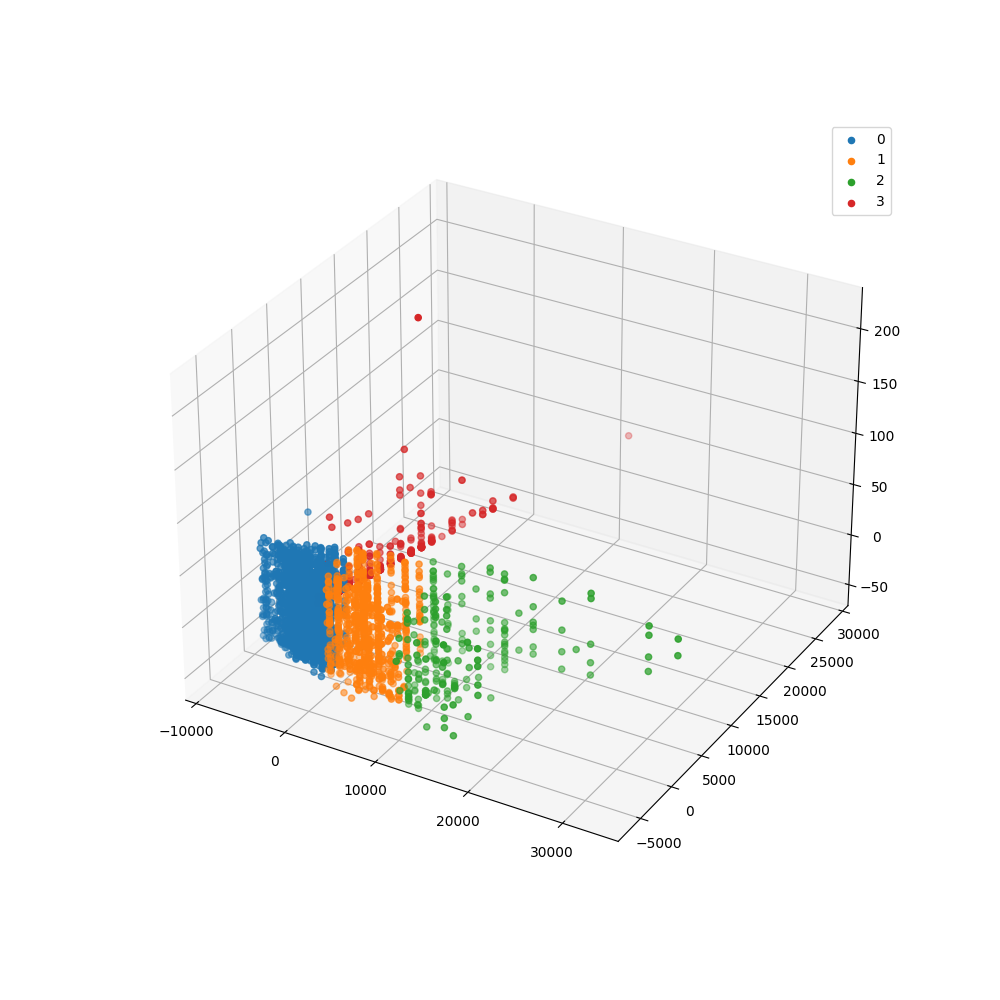

In [55]:
three_d_plt(pca_X, kmeans_labels, n_clusters);

### t-SNE

In [57]:
tsne_labels = kmeans(tsne_X, n_clusters);

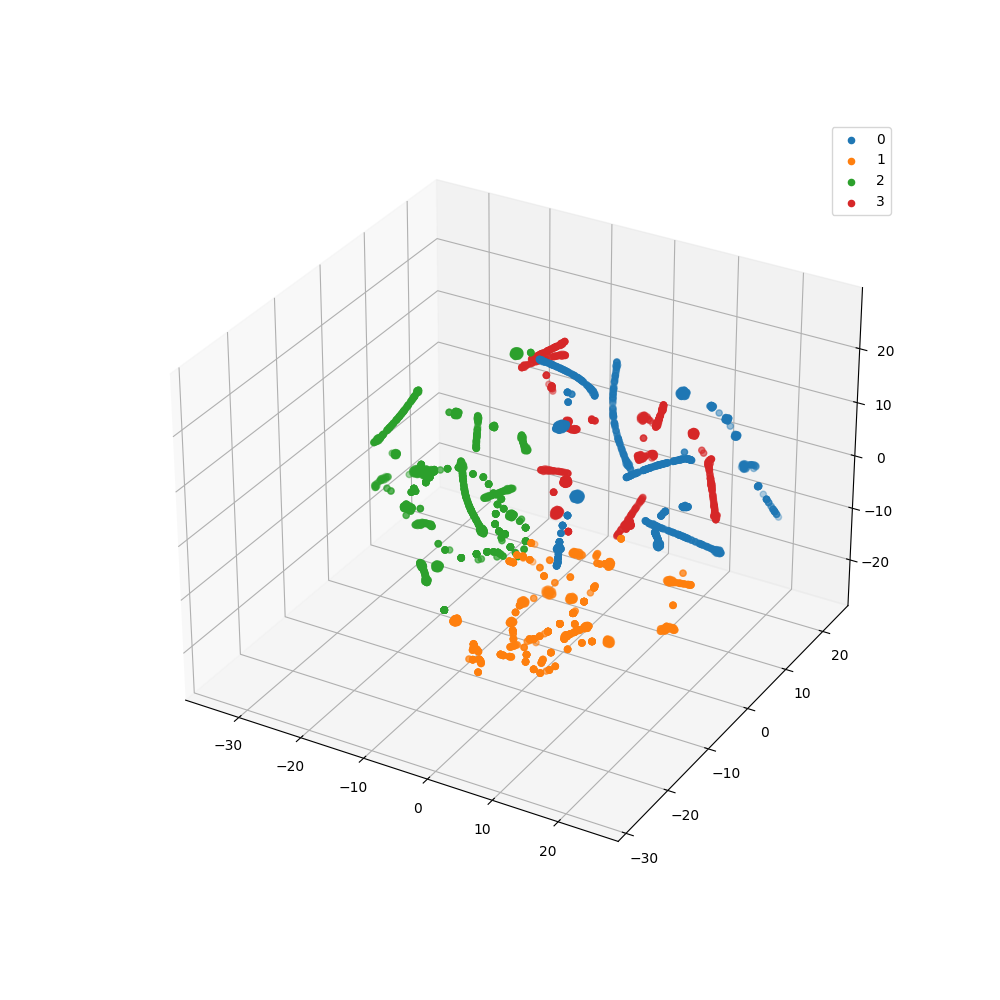

In [61]:
three_d_plt(tsne_X, tsne_labels, n_clusters);

### Actual

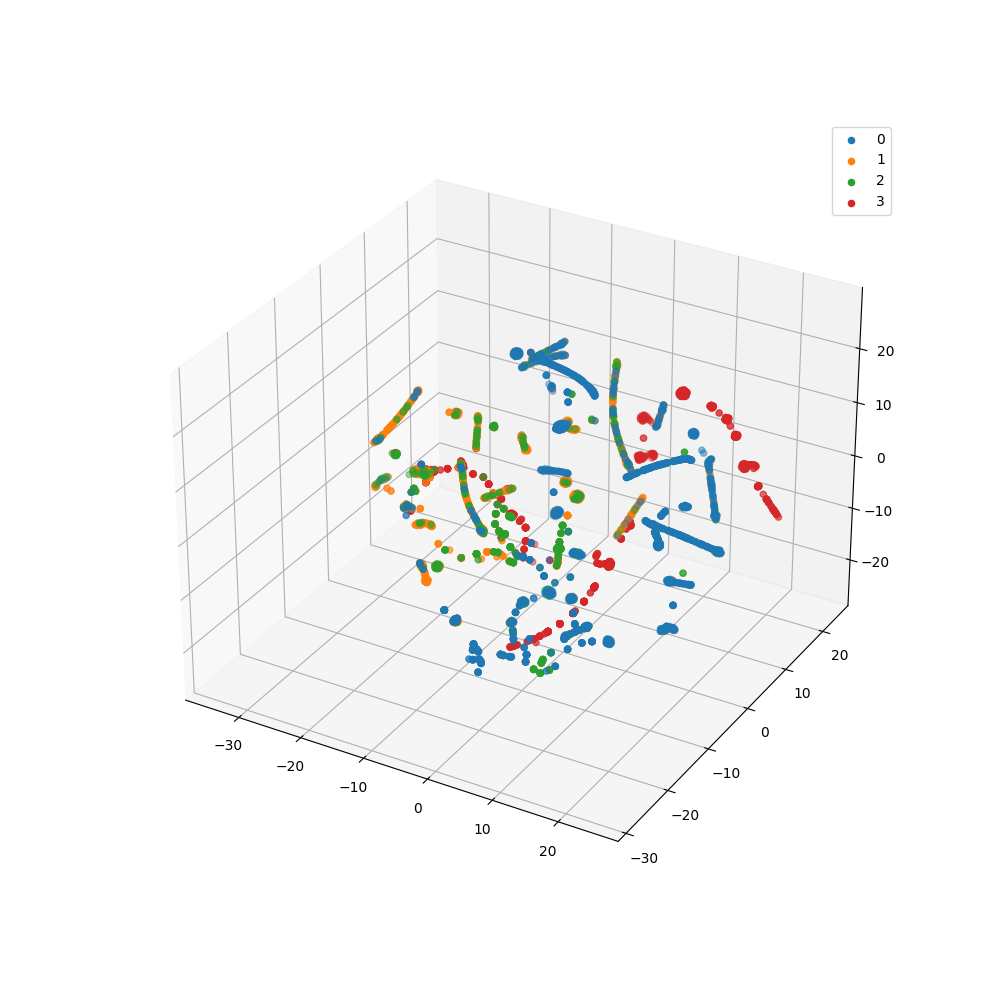

In [62]:
three_d_plt(tsne_X, y, n_clusters);